In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pynwb import NWBHDF5IO

In [2]:
filepath = '/projectnb/stephenlab/jtauber/cohlib/nwb/Rat15_Insertion1_Depth2.nwb'
io = NWBHDF5IO(filepath, mode="r")
nwbfile = io.read()
nwbfile

root pynwb.file.NWBFile at 0x22536931012528
Fields:
  acquisition: {
    wideband_multichannel_recording <class 'pynwb.ecephys.ElectricalSeries'>
  }
  data_collection: Data was collected with a 128-site high-density silicon probe using the Intan RHD2000 electrophysiological recording system. Wideband signals (0.1  7500 Hz) were acquired with 20 kHz/channel sampling rate and with 16-bit resolution. On average, two insertions were made in a single animal and extracellular electrical activity was acquired from 2-3 cortical depths for ~30 minutes at each recording position. Spike sorting was performed on the acquired wideband data using Kilosort2. Several properties of the sorted single units as well as various spike sorting quality metrics are provided.
  devices: {
    Probe_D09_R13 <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    Probe_D09_R13 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: Spontaneously occurring slow-wave activity (local field potentials and extracellular spiking activity) from multiple layers of the neocortex of rats anesthetized with ketamine/xylazine.
  experimenter: [b'Csaba Horv\xe1th, Lili Fanni T\xf3th, Istv\xe1n Ulbert, Rich\xe1rd Fi\xe1th']
  file_create_date: [datetime.datetime(2021, 3, 17, 3, 17, 11, 408000, tzinfo=tzoffset(None, 3600))]
  identifier: Rat15_Insertion1_Depth2
  institution: Institute of Cognitive Neuroscience and Psychology, Research Centre for Natural Sciences, Budapest, Hungary
  keywords: <HDF5 dataset "keywords": shape (7,), type "|O">
  lab: Integrative Neuroscience Group (UlbertLab)
  pharmacology: The rat was anesthetized by an intramuscular or intraperitoneal injection of a mixture of ketamine (75 mg/kg of body weight) and xylazine (10 mg/kg of body weight). To maintain the depth of anesthesia during surgery and recordings, and to sustain the ongoing cortical slow-wave activity, supplementary intramuscular injections were given to the rats regularly using the same anesthetic cocktail.
  related_publications: [b'Publication related to the silicon probe: Fiath et al. (2018) "A silicon-based neural probe with densely-packed low-impedance titanium nitride microelectrodes for ultrahigh-resolution in vivo recordings." Biosensors and Bioelectronics 106: 86-92. DOI: 10.1016/j.bios.2018.01.060']
  session_description: Acute recording from the neocortex of a ketamine/xylazine-anesthetized rat using a 128-site high-density probe, and spike sorting results.
  session_id: Rat15_Insertion1_Depth2
  session_start_time: 2018-11-21 12:22:29+01:00
  subject: subject pynwb.file.Subject at 0x22536931330032
Fields:
  description: strain: Wistar
  genotype: Wild type
  sex: M
  species: Rattus norvegicus
  subject_id: Rat15
  weight: 270 g

  surgery: The rat was anesthetized with ketamine/xylazine, placed in a stereotaxic frame, then a small craniotomy was drilled over the target cortical area. After puncturing the dura mater, the recording probe was inserted into the brain tissue with a slow speed.
  timestamps_reference_time: 2018-11-21 12:22:29+01:00
  units: units <class 'pynwb.misc.Units'>

In [3]:
units = nwbfile.units

In [4]:
electrodes = nwbfile.electrodes
electrodes_df = electrodes.to_dataframe()
electrodes_df.head()

x       y       z     imp      location                 filtering  \
id                                                                           
1   b'NaN'  b'NaN'  b'NaN'  b'NaN'  b'PtA, L2/3'  b'Bandpass: 0.1-7500 Hz'   
2   b'NaN'  b'NaN'  b'NaN'  b'NaN'  b'PtA, L2/3'  b'Bandpass: 0.1-7500 Hz'   
3   b'NaN'  b'NaN'  b'NaN'  b'NaN'  b'PtA, L2/3'  b'Bandpass: 0.1-7500 Hz'   
4   b'NaN'  b'NaN'  b'NaN'  b'NaN'  b'PtA, L2/3'  b'Bandpass: 0.1-7500 Hz'   
5   b'NaN'  b'NaN'  b'NaN'  b'NaN'  b'PtA, L2/3'  b'Bandpass: 0.1-7500 Hz'   

                                                group        group_name  \
id                                                                        
1   Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...  b'Probe_D09_R13'   
2   Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...  b'Probe_D09_R13'   
3   Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...  b'Probe_D09_R13'   
4   Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...  b'Probe_D09_R13'   
5   Probe_D09_R13 pynwb.ecephys.ElectrodeGroup at ...  b'Probe_D09_R13'   

    rel_x  rel_y  
id                
1    16.0  707.5  
2    38.5  707.5  
3    61.0  707.5  
4    83.5  707.5  
5    16.0  685.0

In [5]:
units_df = units.to_dataframe()
units_df.head()

spike_times  cluster_id  \
id                                                                    
4791  [0.1276, 0.59575, 0.95865, 0.97345, 1.607, 1.9...           4   
4792  [1.6145, 2.02715, 3.0936, 3.1957, 4.38745, 5.7...          43   
4793  [1.9328, 2.4176, 3.07585, 3.1915, 4.99395, 6.9...          57   
4794  [0.6046, 1.1227, 1.6017, 2.00365, 2.4243, 3.06...          59   
4795  [0.2773, 0.2896, 0.682, 1.1179, 1.1371, 1.6181...         119   

                        mean_waveform_all_channels_filt  \
id                                                        
4791  [[-4.235390625000009, -3.0715312499999956, -2....   
4792  [[-1.0550155666251588, -1.7133530510585369, -1...   
4793  [[-2.991474226804116, -2.4830000000000028, -1....   
4794  [[-1.8963254237288178, -1.1022457627118603, -0...   
4795  [[-0.08537210291303415, 0.20449500318945457, 0...   

                         mean_waveform_all_channels_raw  \
id                                                        
4791  [[7.987610124439271, 5.37723511904763, 3.17984...   
4792  [[-8.507713785949331, -8.292450903358445, -8.6...   
4793  [[5.888962679558598, 5.53544768877221, 4.75562...   
4794  [[5.212849191727797, 2.3251607017112996, 1.077...   
4795  [[-0.8787874577362459, -0.7893575613674462, -0...   

                          waveform_sd_all_channels_filt  \
id                                                        
4791  [[20.78131687028122, 19.227914038716534, 19.67...   
4792  [[29.78473617549712, 25.363185430213324, 24.21...   
4793  [[21.639773722111364, 18.772378019725256, 19.1...   
4794  [[23.885565163763793, 20.29166704311781, 19.23...   
4795  [[17.343705502605065, 15.202863478192477, 14.8...   

                           waveform_sd_all_channels_raw  \
id                                                        
4791  [[37.458108823525016, 35.59974689912755, 35.93...   
4792  [[53.04786775063474, 46.36150712444063, 44.809...   
4793  [[40.67028792390554, 36.85302218067602, 36.358...   
4794  [[40.648031620060394, 36.39200129558002, 35.02...   
4795  [[28.57477182722131, 26.18649117798002, 25.622...   

                   mean_waveform_all_channels_filt_32x4  \
id                                                        
4791  [[[-4.235390625000009, -3.6643593749999854, -1...   
4792  [[[-1.0550155666251588, -0.7700435865504375, -...   
4793  [[[-2.991474226804116, -5.601123711340213, -7....   
4794  [[[-1.8963254237288178, -2.414893220338986, -3...   
4795  [[[-0.08537210291303415, 0.022389963852859854,...   

                    mean_waveform_all_channels_raw_32x4  \
id                                                        
4791  [[[7.987610124439271, 7.4951930641822235, 3.33...   
4792  [[[-8.507713785949331, -6.342844993584258, -5....   
4793  [[[5.888962679558598, 7.447776580127561, 13.20...   
4794  [[[5.212849191727797, 5.995993949070667, 7.938...   
4795  [[[-0.8787874577362459, -0.7679517713830175, -...   

                        mean_waveform_peak_channel_filt  \
id                                                        
4791  [[-4.235390625000009], [-4.067343749999998], [...   
4792  [[-2.6538698630137025], [-2.2926463262764574],...   
4793  [[-7.288979381443312], [-6.8079793814432925], ...   
4794  [[-3.867874576271181], [-3.8518118644067907], ...   
4795  [[-3.5334679991494813], [-3.381879651286411], ...   

                         mean_waveform_peak_channel_raw  ...  isi_violations  \
id                                                       ...                   
4791  [[7.987610124439271], [6.971907257294918], [5....  ...        0.218299   
4792  [[-4.7034680883109905], [-5.342331568551791], ...  ...        0.000000   
4793  [[13.208726168539044], [12.448144853987449], [...  ...        0.000000   
4794  [[7.938607749938603], [6.8018127383145695], [6...  ...        0.000000   
4795  [[5.5467171527740184], [5.530733954396323], [5...  ...        0.000000   

      amplitude_cutoff        snr  max_drift  cumulative_drift  \
id                   

In [6]:
def get_trial_spikes(units, time_start, time_end):

    num_units = len(units['spike_times'])
    trial_spikes = []
    for n in range(num_units):
        st_n = units['spike_times'][n]
        time_filt = (st_n > time_start) & (st_n < time_end)
        trial_spikes.append(st_n[time_filt])

    return trial_spikes

In [7]:
30 * 60 / 10

180.0

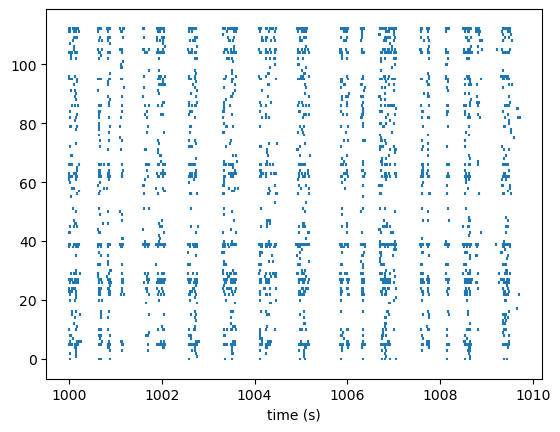

In [8]:
time_start = 1000
time_end = time_start + 10


trial_spikes = get_trial_spikes(units, time_start, time_end)
fig, axs = plt.subplots(sharex="all")
plt.xlabel("time (s)")
axs.eventplot(trial_spikes)
# axs[0].set_xlim(trial_spikes)

# axs[0].set_ylabel("trial")

# axs[1].hist(np.hstack(trial_spikes), 200)

In [9]:
import numpy as np

def spike_times_to_binary(spike_times, time_start, duration=None, bin_width=0.001):
    """
    Convert spike times to a binary vector with specified bin width.

    Parameters
    ----------
    spike_times : array-like
        List or array of spike times (in seconds).
    duration : float, optional
        Total duration to cover (in seconds). 
        If None, it uses the maximum spike time rounded up.
    bin_width : float, optional
        Width of each bin (in seconds). Default is 0.001 (1 ms).

    Returns
    -------
    binary_vector : np.ndarray
        Binary vector indicating spike occurrence in each bin.
    """
    spike_times = np.asarray(spike_times) - time_start
    
    if duration is None:
        duration = np.ceil(spike_times.max() / bin_width) * bin_width
    
    n_bins = int(np.ceil(duration / bin_width))
    binary_vector = np.zeros(n_bins, dtype=int)
    
    spike_indices = (spike_times / bin_width).astype(int)
    spike_indices = spike_indices[spike_indices < n_bins]  # avoid out-of-bounds
    binary_vector[spike_indices] = 1
    
    return binary_vector


In [10]:
def mv_spike_times_to_binary(spike_times_mv, time_start, duration):
    K = len(spike_times_mv)
    units_binary = []
    for k in range(K):
        binary_k = spike_times_to_binary(spike_times_mv[k], time_start, duration=10)
        units_binary.append(binary_k)

    return np.stack(units_binary, axis=1)

In [11]:
time_start = 50
time_end = time_start + 10

In [12]:
duration = 10
spikes_windows = []
for i in range(180):
    time_start = i*10 
    time_end = time_start + duration
    trial_spikes = get_trial_spikes(units, time_start, time_end)
    spikes_window = mv_spike_times_to_binary(trial_spikes, time_start, duration)
    spikes_windows.append(spikes_window)

In [13]:
obs = np.stack(spikes_windows, axis=2)

In [14]:
obs.shape

(10000, 113, 180)

In [15]:
sort_fr = np.argsort((obs*1000).mean((0,2)))[::-1]

In [16]:
sorted_obs = obs[:,sort_fr,:]

In [17]:
mus = np.log(1000*sorted_obs.mean((0,2)))

In [18]:
temp = {'mu': -3}
yx = temp.get('mu_type')
type(yx)

NoneType

In [19]:
import jax.numpy as jnp
temp = jnp.zeros_like(sorted_obs)
temp + mus[None,:,None]

Array([[[ 2.8577466,  2.8577466,  2.8577466, ...,  2.8577466,
          2.8577466,  2.8577466],
        [ 2.8411555,  2.8411555,  2.8411555, ...,  2.8411555,
          2.8411555,  2.8411555],
        [ 2.7531652,  2.7531652,  2.7531652, ...,  2.7531652,
          2.7531652,  2.7531652],
        ...,
        [-1.746149 , -1.746149 , -1.746149 , ..., -1.746149 ,
         -1.746149 , -1.746149 ],
        [-1.8430527, -1.8430527, -1.8430527, ..., -1.8430527,
         -1.8430527, -1.8430527],
        [-1.9425824, -1.9425824, -1.9425824, ..., -1.9425824,
         -1.9425824, -1.9425824]],

       [[ 2.8577466,  2.8577466,  2.8577466, ...,  2.8577466,
          2.8577466,  2.8577466],
        [ 2.8411555,  2.8411555,  2.8411555, ...,  2.8411555,
          2.8411555,  2.8411555],
        [ 2.7531652,  2.7531652,  2.7531652, ...,  2.7531652,
          2.7531652,  2.7531652],
        ...,
        [-1.746149 , -1.746149 , -1.746149 , ..., -1.746149 ,
         -1.746149 , -1.746149 ],
        [-1.

Text(0.5, 1.0, 'Mean Firing Rate')

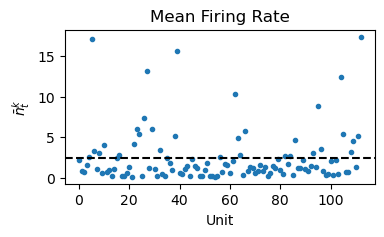

In [20]:
fig, ax = plt.subplots(figsize=(4,2))
ax.plot((obs*1000).mean((0,2)), '.')
ax.axhline(2.5, color='k', linestyle='dashed')
ax.set_xlabel('Unit')
ax.set_ylabel(r'$\bar{n}_t^k$')
ax.set_title('Mean Firing Rate')


In [21]:
def get_trial_spikes_sorted(units, time_start, time_end, fr_sort):

    num_units = len(units['spike_times'])
    trial_spikes = []
    for n in fr_sort:
        st_n = units['spike_times'][int(n)]
        time_filt = (st_n > time_start) & (st_n < time_end)
        trial_spikes.append(st_n[time_filt])

    return trial_spikes

In [22]:
sort_fr = jnp.argsort(obs.mean((0,2)))[::-1]

In [23]:
fr_sorted = obs[:,sort_fr,:].mean((0,2))

In [24]:
fr_sorted

array([0.01742222, 0.01713556, 0.01569222, 0.01319222, 0.01244833,
       0.01029389, 0.00891667, 0.00734111, 0.006     , 0.00597889,
       0.00583056, 0.00547   , 0.00545833, 0.00519778, 0.00518056,
       0.00486111, 0.00464944, 0.00454944, 0.00420444, 0.00404778,
       0.00359333, 0.00346389, 0.00326944, 0.00319833, 0.00309444,
       0.00309389, 0.00288056, 0.00279944, 0.00274167, 0.00269667,
       0.00259722, 0.00259167, 0.00249167, 0.00244944, 0.00235556,
       0.00231111, 0.00225333, 0.00224722, 0.00221056, 0.00210611,
       0.00209944, 0.00189778, 0.00188889, 0.00176778, 0.00169056,
       0.00163222, 0.00159722, 0.00158444, 0.00150111, 0.00149944,
       0.001445  , 0.00142   , 0.0014    , 0.00138778, 0.001355  ,
       0.00130556, 0.00128556, 0.00123444, 0.00122667, 0.00122611,
       0.00120778, 0.00119056, 0.00118111, 0.00114778, 0.00114389,
       0.001095  , 0.00109167, 0.00108944, 0.001     , 0.00097944,
       0.00092722, 0.00092444, 0.00091056, 0.00090667, 0.00087

In [25]:
test = get_trial_spikes_sorted(units, 0, 10, sort_fr)

In [26]:
len(test)

113

In [37]:
save_path = '/projectnb/stephenlab/jtauber/cohlib/experiments/poster_figures'

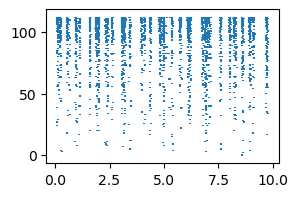

In [38]:
import os
fig, axs = plt.subplots(figsize=(3,2), sharex="all")
# plt.xlabel("time (s)")
axs.eventplot(test[::-1])
save_name = os.path.join(save_path, '4raster.png')
plt.savefig(save_name, dpi=600, bbox_inches="tight")


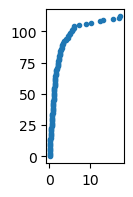

In [39]:
fig, ax = plt.subplots(figsize=(1,2))
x = jnp.arange(fr_sorted.size)
ax.plot(fr_sorted[::-1]*1000, x, '.')

save_name = os.path.join(save_path, '4means.png')
plt.savefig(save_name, dpi=600, bbox_inches="tight")

# ax.axhline(2.5, color='k', linestyle='dashed')
# ax.set_xlabel('Unit')
# ax.set_ylabel(r'$\bar{n}_t^k$')
# ax.set_title('Mean Firing Rate')

In [29]:
gt25 = np.where(((obs*1000).mean((0,2)) > 2.5))[0]
lt25 = np.where(((obs*1000).mean((0,2)) < 2.5))[0]

In [30]:
lt25.shape

(81,)

In [31]:
K = len(trial_spikes)
L = 180

In [32]:
freqs = np.fft.rfftfreq(10000, 1e-3)[1:]
freqs

array([1.000e-01, 2.000e-01, 3.000e-01, ..., 4.998e+02, 4.999e+02,
       5.000e+02])

In [34]:
sort_fr

Array([112,   5,  39,  27, 104,  62,  95,  26,  23,  29,  66, 105,  24,
       111,  38,  63,  86, 109,  22,  10,  96,  32,   6, 108,  93,   8,
        64,  16,  84,  82,  56,   4,  15,  35,  79,  45,   0,  89, 102,
        61, 100,  51,  36,  58,  83,  72,   3,  59,  46,  77,  43,  92,
       110,  94,  74,  20,  68,  88,  28,  47,  78,  69,  87,  30,  90,
        42,  14,   7,  12,  37,  50,  80,  67,  71,   1,  91,  73,  97,
         2,  11, 107, 106,  57,  19,  40,  60,  70,  76,   9,  81,  41,
        99, 103,  33,  98, 101,  65,  85,  75,  49,  13,  34,  44,  53,
        25,  31,  48,  55,  52,  17,  18,  54,  21], dtype=int32)

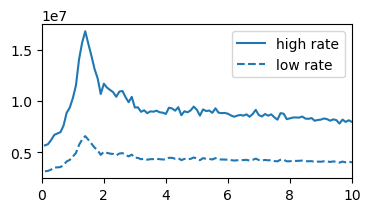

In [40]:
fig, ax = plt.subplots(figsize=(4,2))
L = 180
res_grand = []
for k in sort_fr[:25]:
    res = []
    for l in range(L):
        n_f0 = np.fft.rfft(obs[:,k,l], axis=0)
        n_f = n_f0[1:]*1e6
        res.append(n_f)
    res_mean = np.abs(np.stack(res, axis=1)).mean(1)
    res_grand.append(res_mean)
    # ax.plot(freqs, res_mean, color='tab:blue', alpha=0.5) 
    ax.set_xlim([0, 10])

res_grand_mean = np.stack(res_grand).mean(0)
ax.plot(freqs, res_grand_mean, label='high rate')
# ax.set_title(f'Mean PSD ({gt25.size} Units; 180 windows)')
# ax.set_xlabel('Freq (Hz)')
# ax.set_ylabel('Power')

for k in sort_fr[25:]:
    res = []
    for l in range(L):
        n_f0 = np.fft.rfft(obs[:,k,l], axis=0)
        n_f = n_f0[1:]*1e6
        res.append(n_f)
    res_mean = np.abs(np.stack(res, axis=1)).mean(1)
    res_grand.append(res_mean)
    # ax.plot(freqs, res_mean, color='tab:blue', alpha=0.5) 
    ax.set_xlim([0, 10])

res_grand_mean = np.stack(res_grand).mean(0)
ax.plot(freqs, res_grand_mean, color='tab:blue', linestyle='--', label='low rate')
ax.set_xlim([0, 10])
plt.legend()

save_name = os.path.join(save_path, '4emp_spec.png')
plt.savefig(save_name, dpi=600, bbox_inches="tight")